In [1]:
# ============================================
# CELL 1: Imports and Setup
# ============================================

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
def load_jsonl(file_path, sample_size=None):
    """
    Load data from .jsonl file
    
    Args:
        file_path: Path to your .jsonl file
        sample_size: Number of lines to load (None = all)
    
    Returns:
        DataFrame with episode data
    """
    print(f"Loading data from {file_path}...")
    
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if sample_size and i >= sample_size:
                break
            try:
                data.append(json.loads(line))
            except json.JSONDecodeError as e:
                print(f"Warning: Could not parse line {i}: {e}")
                continue
    
    df = pd.DataFrame(data)
    print(f" Loaded {len(df)} episodes")
    print(f" Columns: {df.columns.tolist()}")
    
    return df

file_path = 'episodeLevelDataSample.jsonl'  # Change to your actual file path
sample_size = 1000  # Start with 1000 episodes for testing

# Load data
episodes_df = load_jsonl(file_path)

# Display first few rows
print("\nFirst 3 rows:")
episodes_df.head(3)



Loading data from episodeLevelDataSample.jsonl...
 Loaded 10000 episodes
 Columns: ['transcript', 'rssUrl', 'epTitle', 'epDescription', 'mp3url', 'podTitle', 'lastUpdate', 'itunesAuthor', 'itunesOwnerName', 'explicit', 'imageUrl', 'language', 'createdOn', 'host', 'podDescription', 'category1', 'category2', 'category3', 'category4', 'category5', 'category6', 'category7', 'category8', 'category9', 'category10', 'oldestEpisodeDate', 'episodeDateLocalized', 'durationSeconds', 'hostPredictedNames', 'numUniqueHosts', 'guestPredictedNames', 'numUniqueGuests', 'neitherPredictedNames', 'numUniqueNeithers', 'mainEpSpeakers', 'numMainSpeakers', 'hostSpeakerLabels', 'guestSpeakerLabels', 'overlapPropTurnCount', 'avgTurnDuration', 'overlapPropDuration', 'totalSpLabels']

First 3 rows:


,transcript,rssUrl,epTitle,epDescription,mp3url,podTitle,lastUpdate,itunesAuthor,itunesOwnerName,explicit,imageUrl,language,createdOn,host,podDescription,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,oldestEpisodeDate,episodeDateLocalized,durationSeconds,hostPredictedNames,numUniqueHosts,guestPredictedNames,numUniqueGuests,neitherPredictedNames,numUniqueNeithers,mainEpSpeakers,numMainSpeakers,hostSpeakerLabels,guestSpeakerLabels,overlapPropTurnCount,avgTurnDuration,overlapPropDuration,totalSpLabels
0,"I'm Simon Shapiro and this is Sing Out Speak Out. Here I give you the philosophies, ideas and s...",https://feeds.buzzsprout.com/783020.rss,Best of SingOut SpeakOut No.3,<p>Best of with snippets from 3 episodes and acoustic performance of 3 new songs.</p>,https://www.buzzsprout.com/783020/4252475-best-of-singout-speakout-no-3.mp3,SingOut SpeakOut,1607561074,Simon Shapiro,Simon Shapiro,0,https://storage.buzzsprout.com/variants/46sq6lamo4aidi7rsw7i7wewqimv/f6fd9b4ca4e468e7e11c8350463...,en-au,1597201071,buzzsprout.com,"Award winning Australian singer-songwriter Simon Shapiro delivers his songs, writing and philoso...",music,society,culture,philosophy,education,self improvement,None,None,None,None,2020-01-04 04:00:00,1592686800000,803.0,[Simon Shapiro],1.0,NO_GUEST_PREDICTED,0.0,NO_NEITHER_IDENTIFIED,0.0,[SPEAKER_00],1.0,{'Simon Shapiro': 'SPEAKER_00'},SPEAKER_DATA_UNAVAILABLE,0.0,60.0,0.0,1.0
1,"I'm Simon Shapiro and this is Sing Out Speak Out. Here I give you the philosophies, ideas and s...",https://feeds.buzzsprout.com/783020.rss,It's All Gone,"<p>Simon introduces &apos;It&apos;s all Gone&apos;, track 4 of the newly released KisTone Album,...",https://www.buzzsprout.com/783020/4165286-it-s-all-gone.mp3,SingOut SpeakOut,1607561074,Simon Shapiro,Simon Shapiro,0,https://storage.buzzsprout.com/variants/46sq6lamo4aidi7rsw7i7wewqimv/f6fd9b4ca4e468e7e11c8350463...,en-au,1597201071,buzzsprout.com,"Award winning Australian singer-songwriter Simon Shapiro delivers his songs, writing and philoso...",music,society,culture,philosophy,education,self improvement,None,None,None,None,2020-01-04 04:00:00,1592136000000,360.0,[Simon Shapiro],1.0,NO_GUEST_PREDICTED,0.0,NO_NEITHER_IDENTIFIED,0.0,"[SPEAKER_00, SPEAKER_01, SPEAKER_02]",3.0,{'Simon Shapiro': 'SPEAKER_00'},SPEAKER_DATA_UNAVAILABLE,0.0,120.053333,0.0,3.0
2,"I'm Simon Shapiro and this is Sing Out Speak Out. Here I give you the philosophies, ideas and s...",https://feeds.buzzsprout.com/783020.rss,Today Is Yesterday,"<p>Simon introduces track 4, of the newly released KisTone album, &apos;Today is Yesterday&apo...",https://www.buzzsprout.com/783020/3983942-today-is-yesterday.mp3,SingOut SpeakOut,1607561074,Simon Shapiro,Simon Shapiro,0,https://storage.buzzsprout.com/variants/46sq6lamo4aidi7rsw7i7wewqimv/f6fd9b4ca4e468e7e11c8350463...,en-au,1597201071,buzzsprout.com,"Award winning Australian singer-songwriter Simon Shapiro delivers his songs, writing and philoso...",music,society,culture,philosophy,education,self improvement,None,None,None,None,2020-01-04 04:00:00,1590922800000,416.0,[Simon Shapiro],1.0,NO_GUEST_PREDICTED,0.0,"[Mike Haveername, Lee Walker]",2.0,"[SPEAKER_02, SPEAKER_03, SPEAKER_04, SPEAKER_05]",4.0,{'Simon Shapiro': 'SPEAKER_05'},SPEAKER_DATA_UNAVAILABLE,0.153846,30.4,0.001847,6.0


In [3]:
# ============================================
# CELL 3: Basic Data Overview
# ============================================


print(f"\nDataset shape: {episodes_df.shape}")
print(f"Number of episodes: {len(episodes_df)}")
print(f"Number of columns: {len(episodes_df.columns)}")

print("\nColumn names and types:")
print(episodes_df.dtypes)


Dataset shape: (10000, 42)
Number of episodes: 10000
Number of columns: 42

Column names and types:
transcript                object
rssUrl                    object
epTitle                   object
epDescription             object
mp3url                    object
podTitle                  object
lastUpdate                 int64
itunesAuthor              object
itunesOwnerName           object
explicit                   int64
imageUrl                  object
language                  object
createdOn                  int64
host                      object
podDescription            object
category1                 object
category2                 object
category3                 object
category4                 object
category5                 object
category6                 object
category7                 object
category8                 object
category9                 object
category10                object
oldestEpisodeDate         object
episodeDateLocalized       int64
duration

In [4]:
print("\nMissing values:")
missing = episodes_df.isnull().sum()
missing_pct = (missing / len(episodes_df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))


Missing values:
                 Missing Count  Percentage
category9                10000      100.00
category10               10000      100.00
category8                 9987       99.87
category7                 9727       97.27
category6                 9435       94.35
category5                 8848       88.48
category4                 7945       79.45
category3                 5743       57.43
category2                 1918       19.18
durationSeconds            323        3.23
epDescription              283        2.83
itunesOwnerName            170        1.70
podDescription              11        0.11
category1                    9        0.09
podTitle                     7        0.07
itunesAuthor                 6        0.06
imageUrl                     6        0.06


In [8]:
# ============================================
# CELL 5: Text Content Analysis
# ============================================

transcript_col = None
for col in ['transcript', 'text', 'content', 'description', 'show_description']:
    if col in episodes_df.columns:
        transcript_col = col
        break

if transcript_col:
    print(f"\n Found transcript column: '{transcript_col}'")
    
    # Calculate text lengths
    episodes_df['text_length'] = episodes_df[transcript_col].apply(
        lambda x: len(str(x)) if pd.notna(x) else 0
    )
    episodes_df['word_count'] = episodes_df[transcript_col].apply(
        lambda x: len(str(x).split()) if pd.notna(x) else 0
    )
    
    print("\nText length statistics (characters):")
    print(episodes_df['text_length'].describe())
    
    print("\nWord count statistics:")
    print(episodes_df['word_count'].describe())
    
    # Show sample transcript
    print("\n" + "="*60)
    print("SAMPLE TRANSCRIPT")
    print("="*60)
    idx = episodes_df['text_length'].idxmax()  # Longest transcript
    print(f"\nEpisode with longest transcript (index {idx}):")
    print(str(episodes_df.loc[idx, transcript_col])[:500] + "...")


 Found transcript column: 'transcript'

Text length statistics (characters):
count     10000.000000
mean      31235.323900
std       26383.977541
min         157.000000
25%       10994.000000
50%       25596.500000
75%       44772.500000
max      409697.000000
Name: text_length, dtype: float64

Word count statistics:
count    10000.000000
mean      5944.003200
std       5089.799464
min         25.000000
25%       2068.000000
50%       4830.500000
75%       8472.000000
max      79132.000000
Name: word_count, dtype: float64

SAMPLE TRANSCRIPT

Episode with longest transcript (index 8890):
 The next memories are from May Morris, or 1928. My mother's name was Hilda Mann and dad's name was Harry Mann. My brothers were Bill, Harry, John and Ken and sisters Mary and Doreen. I stayed in Chatham. We were going to be inspected by King George so we have been given a few days off. I was in the Naffy Club. Some sailors had arrived from Aurora Navy ship. They had been sailing the Mediterranean. A y

PODCAST SHOWS ANALYSIS

 Found show column: 'podTitle'

Number of unique shows: 1825

Top 10 shows with most episodes:
podTitle
DittyTV's Insights | Music Interviews                               196
Good Days With Gwen                                                  84
PSP                                                                  68
Luna Scott und Friends                                               67
Finding Genius Podcast                                               62
Audrey                                                               61
The Membership Freedom Podcast                                       57
Questions Kids Ask                                                   56
Transitions Daily Alcoholics Anonymous Recovery Readings Podcast     56
The Friend                                                           54
Name: count, dtype: int64

Episodes per show statistics:
  Mean: 5.48
  Median: 4.00
  Max: 196
  Min: 1


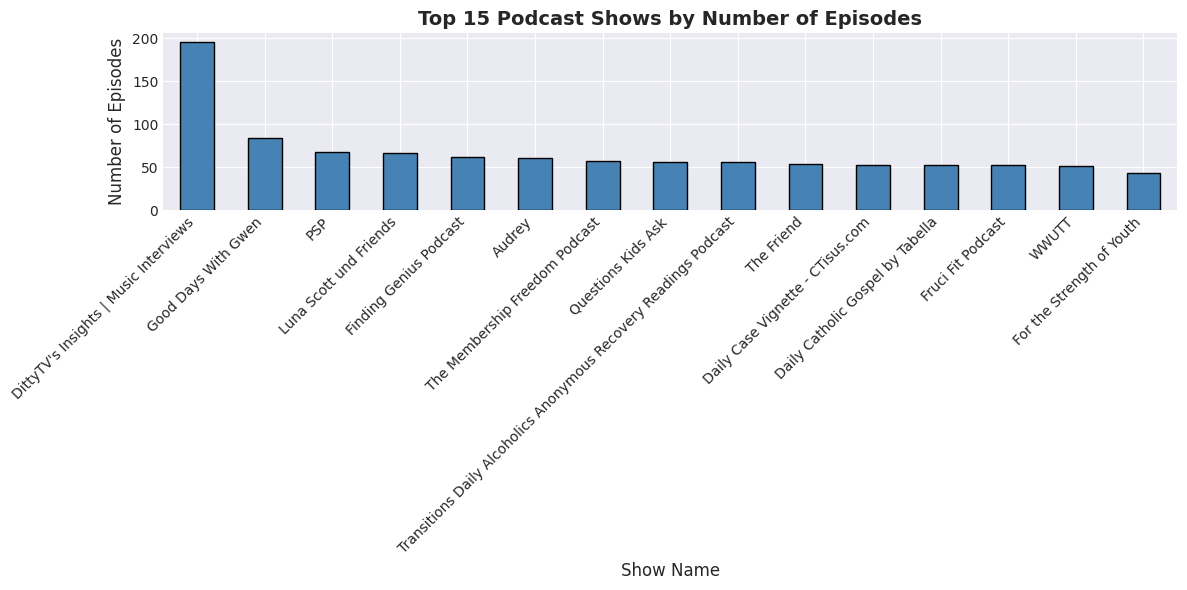

In [9]:
# ============================================
# CELL 6: Categorical Analysis - Shows
# ============================================

print("="*60)
print("PODCAST SHOWS ANALYSIS")
print("="*60)

# Find show name column
show_col = None
for col in ['podTitle', 'show', 'podcast_name', 'show_filename_prefix']:
    if col in episodes_df.columns:
        show_col = col
        break

if show_col:
    print(f"\n Found show column: '{show_col}'")
    
    show_counts = episodes_df[show_col].value_counts()
    print(f"\nNumber of unique shows: {len(show_counts)}")
    print(f"\nTop 10 shows with most episodes:")
    print(show_counts.head(10))
    
    # Statistics
    print(f"\nEpisodes per show statistics:")
    print(f"  Mean: {show_counts.mean():.2f}")
    print(f"  Median: {show_counts.median():.2f}")
    print(f"  Max: {show_counts.max()}")
    print(f"  Min: {show_counts.min()}")
    
    # Visualize
    plt.figure(figsize=(12, 6))
    show_counts.head(15).plot(kind='bar', color='steelblue', edgecolor='black')
    plt.title('Top 15 Podcast Shows by Number of Episodes', fontsize=14, fontweight='bold')
    plt.xlabel('Show Name', fontsize=12)
    plt.ylabel('Number of Episodes', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    


 Found category column: 'category1'

Number of unique categories: 20

Top 15 categories:
category1
religion      1982
business      1153
society       1118
education      977
sports         901
health         779
news           496
comedy         490
arts           411
music          372
tv             364
leisure        338
kids           135
science        131
technology     115
Name: count, dtype: int64


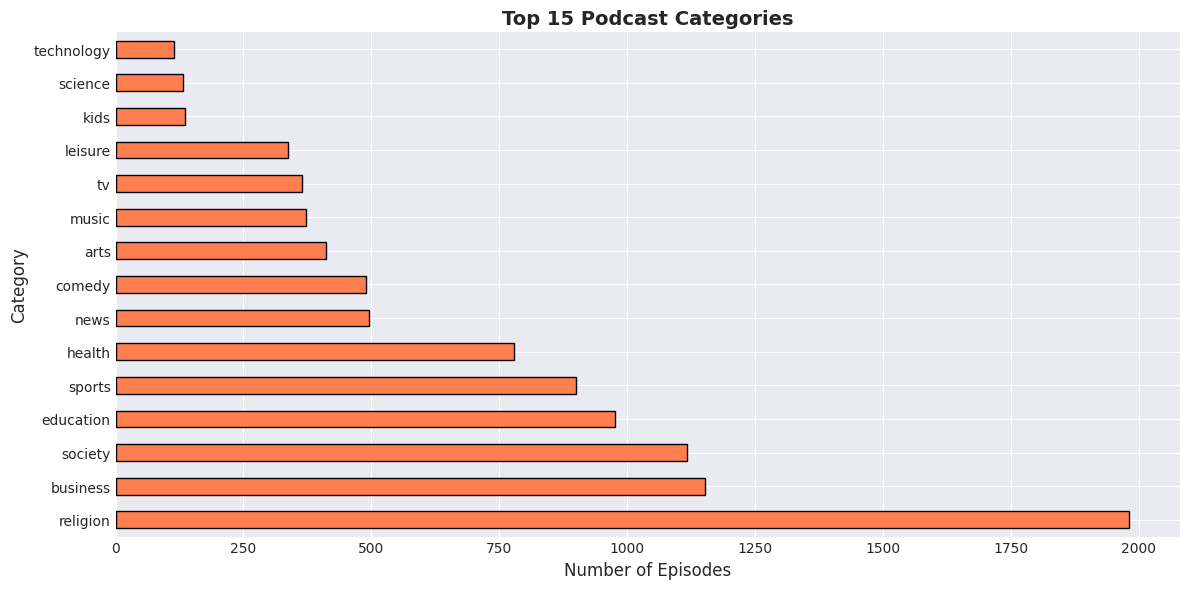

In [10]:
# ============================================
# CELL 7: Categorical Analysis - Categories
# ============================================

# Find category column
category_col = None
for col in ['category1', 'categories', 'genre', 'rss_category']:
    if col in episodes_df.columns:
        category_col = col
        break

if category_col:
    print(f"\n Found category column: '{category_col}'")
    
    # Handle if categories is a list
    if episodes_df[category_col].dtype == 'object':
        # Check if first value is a list
        first_val = episodes_df[category_col].iloc[0]
        if isinstance(first_val, list):
            # Flatten list of categories
            all_categories = []
            for cats in episodes_df[category_col]:
                if isinstance(cats, list):
                    all_categories.extend(cats)
                else:
                    all_categories.append(cats)
            category_counts = pd.Series(all_categories).value_counts()
            print("(Note: Episodes can have multiple categories)")
        else:
            category_counts = episodes_df[category_col].value_counts()
    else:
        category_counts = episodes_df[category_col].value_counts()
    
    print(f"\nNumber of unique categories: {len(category_counts)}")
    print(f"\nTop 15 categories:")
    print(category_counts.head(15))
    
    # Visualize
    plt.figure(figsize=(12, 6))
    category_counts.head(15).plot(kind='barh', color='coral', edgecolor='black')
    plt.title('Top 15 Podcast Categories', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Episodes', fontsize=12)
    plt.ylabel('Category', fontsize=12)
    plt.tight_layout()
    plt.show()
    

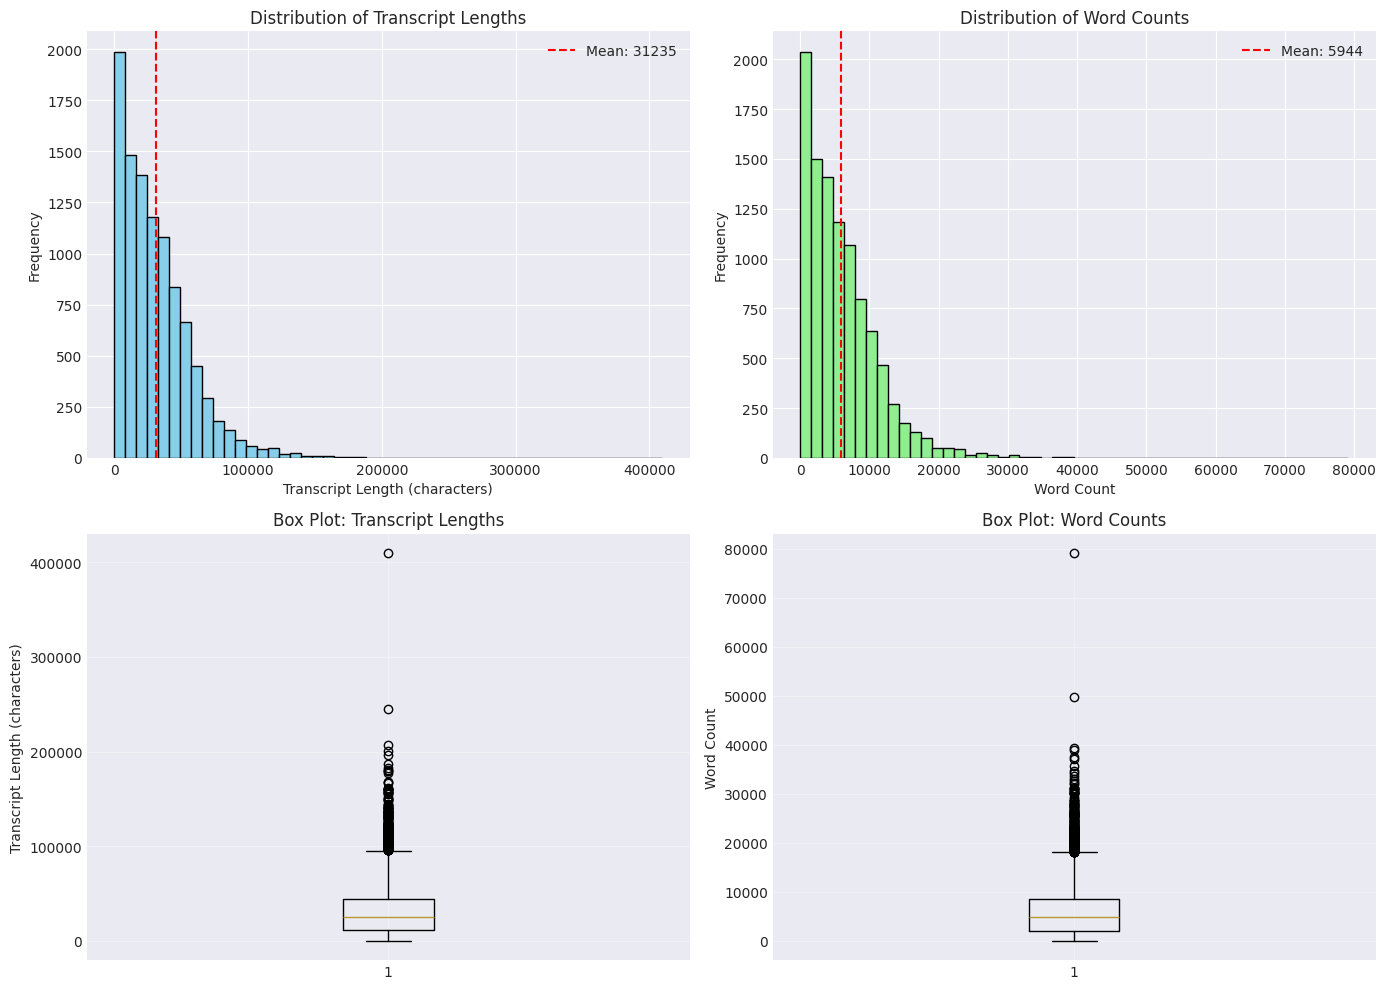


Potential data quality issues:
  - Episodes with <50 words: 19 (0.2%)
  - Episodes with >50K words: 1 (0.0%)
  - Empty transcripts: 0 (0.0%)


In [11]:
# ============================================
# CELL 8: Text Length Distribution
# ============================================

if transcript_col and 'text_length' in episodes_df.columns:
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Character length histogram
    axes[0, 0].hist(episodes_df['text_length'], bins=50, color='skyblue', edgecolor='black')
    axes[0, 0].set_xlabel('Transcript Length (characters)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Distribution of Transcript Lengths')
    axes[0, 0].axvline(episodes_df['text_length'].mean(), color='red', 
                       linestyle='--', label=f"Mean: {episodes_df['text_length'].mean():.0f}")
    axes[0, 0].legend()
    
    # Word count histogram
    axes[0, 1].hist(episodes_df['word_count'], bins=50, color='lightgreen', edgecolor='black')
    axes[0, 1].set_xlabel('Word Count')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title('Distribution of Word Counts')
    axes[0, 1].axvline(episodes_df['word_count'].mean(), color='red', 
                       linestyle='--', label=f"Mean: {episodes_df['word_count'].mean():.0f}")
    axes[0, 1].legend()
    
    # Box plot - character length
    axes[1, 0].boxplot(episodes_df['text_length'], vert=True)
    axes[1, 0].set_ylabel('Transcript Length (characters)')
    axes[1, 0].set_title('Box Plot: Transcript Lengths')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Box plot - word count
    axes[1, 1].boxplot(episodes_df['word_count'], vert=True)
    axes[1, 1].set_ylabel('Word Count')
    axes[1, 1].set_title('Box Plot: Word Counts')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Identify potential issues
    print("\nPotential data quality issues:")
    
    very_short = (episodes_df['word_count'] < 50).sum()
    print(f"  - Episodes with <50 words: {very_short} ({very_short/len(episodes_df)*100:.1f}%)")
    
    very_long = (episodes_df['word_count'] > 50000).sum()
    print(f"  - Episodes with >50K words: {very_long} ({very_long/len(episodes_df)*100:.1f}%)")
    
    empty = (episodes_df['text_length'] == 0).sum()
    print(f"  - Empty transcripts: {empty} ({empty/len(episodes_df)*100:.1f}%)")

In [6]:
# ============================================
# CELL 9: Temporal Analysis (if date available)
# ============================================

date_col = None
for col in ['date', 'publish_date', 'published_date', 'publication_date', 'episode_pub_date']:
    if col in episodes_df.columns:
        date_col = col
        break

if date_col:
    print(f"\n Found date column: '{date_col}'")
    
    # Convert to datetime
    episodes_df['pub_date'] = pd.to_datetime(episodes_df[date_col], errors='coerce')
    
    # Remove rows where date conversion failed
    valid_dates = episodes_df['pub_date'].notna()
    print(f"\nEpisodes with valid dates: {valid_dates.sum()} ({valid_dates.sum()/len(episodes_df)*100:.1f}%)")
    
    if valid_dates.sum() > 0:
        date_df = episodes_df[valid_dates].copy()
        
        print(f"\nDate range:")
        print(f"  Earliest: {date_df['pub_date'].min()}")
        print(f"  Latest: {date_df['pub_date'].max()}")
        
        # Extract month and year
        date_df['year_month'] = date_df['pub_date'].dt.to_period('M')
        
        # Count by month
        monthly_counts = date_df['year_month'].value_counts().sort_index()
        
        # Plot timeline
        plt.figure(figsize=(14, 6))
        monthly_counts.plot(kind='line', marker='o', color='purple', linewidth=2)
        plt.title('Episodes Published Over Time', fontsize=14, fontweight='bold')
        plt.xlabel('Month', fontsize=12)
        plt.ylabel('Number of Episodes', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
else:
    print("\n No date column found")



 No date column found


KEYWORD ANALYSIS

Top 30 most frequent words:
  you: 1641540
  yeah: 356264
  because: 248840
  your: 239090
  don: 235966
  people: 214724
  right: 203012
  really: 201845
  then: 186835
  how: 158170
  now: 150840
  time: 140483
  some: 139433
  well: 139206
  them: 137623
  our: 134858
  got: 133587
  want: 133366
  who: 131824
  kind: 129543
  say: 122055
  things: 118478
  good: 113729
  see: 112766
  she: 112750
  lot: 112464
  mean: 112182
  where: 111162
  his: 104910
  back: 104702


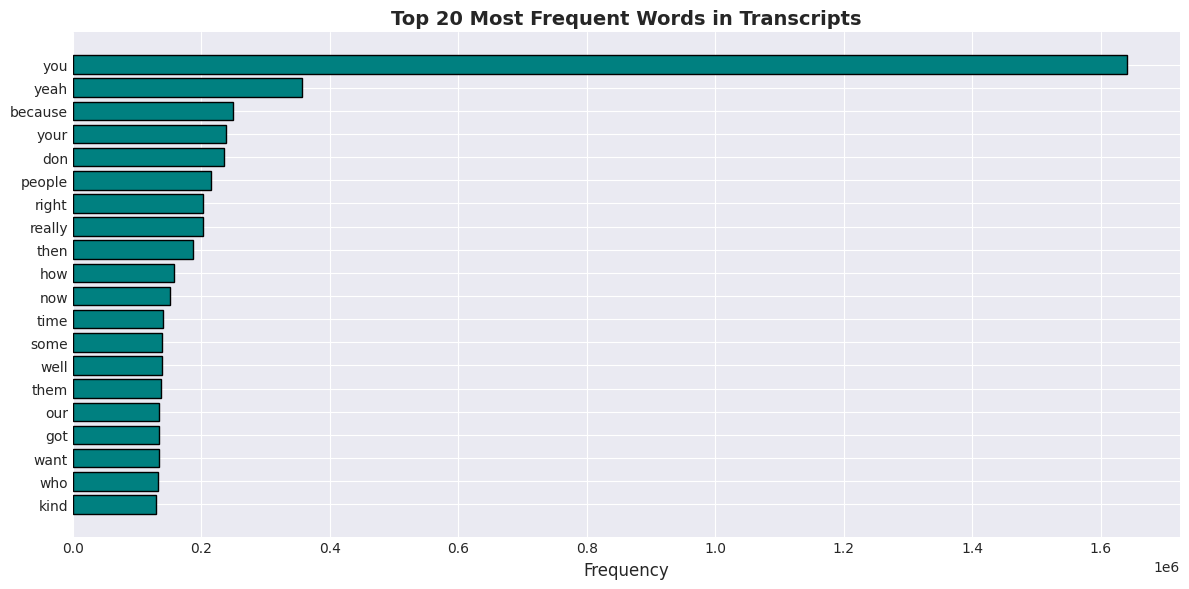

In [12]:
# ============================================
# CELL 10: Word Cloud (Top Keywords)
# ============================================

if transcript_col:
    print("="*60)
    print("KEYWORD ANALYSIS")
    print("="*60)
    
    # Combine all transcripts
    all_text = ' '.join(episodes_df[transcript_col].dropna().astype(str))
    
    # Simple word frequency (without proper NLP preprocessing)
    from collections import Counter
    import re
    
    # Basic tokenization
    words = re.findall(r'\b[a-z]{3,}\b', all_text.lower())
    
    # Remove common stopwords
    stopwords = {'the', 'and', 'for', 'this', 'that', 'with', 'from', 'have', 
                 'but', 'not', 'they', 'was', 'are', 'been', 'will', 'can', 
                 'just', 'about', 'like', 'know', 'think', 'get', 'going', 
                 'said', 'one', 'would', 'could', 'its', 'more', 'when', 
                 'what', 'there', 'out', 'all', 'were', 'had', 'has'}
    
    words = [w for w in words if w not in stopwords]
    
    # Count word frequencies
    word_counts = Counter(words)
    top_words = word_counts.most_common(30)
    
    print("\nTop 30 most frequent words:")
    for word, count in top_words:
        print(f"  {word}: {count}")
    
    # Visualize top words
    words_df = pd.DataFrame(top_words[:20], columns=['Word', 'Frequency'])
    
    plt.figure(figsize=(12, 6))
    plt.barh(range(len(words_df)), words_df['Frequency'], color='teal', edgecolor='black')
    plt.yticks(range(len(words_df)), words_df['Word'])
    plt.xlabel('Frequency', fontsize=12)
    plt.title('Top 20 Most Frequent Words in Transcripts', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [13]:
# ============================================
# CELL 11: Data Quality Summary
# ============================================

quality_issues = []

# Check transcript quality
if transcript_col:
    empty_transcripts = episodes_df[transcript_col].isna().sum()
    if empty_transcripts > 0:
        quality_issues.append(f" {empty_transcripts} episodes with missing transcripts")
    
    if 'word_count' in episodes_df.columns:
        short_transcripts = (episodes_df['word_count'] < 50).sum()
        if short_transcripts > 0:
            quality_issues.append(f" {short_transcripts} episodes with <50 words")

# Check metadata quality
if show_col:
    missing_show = episodes_df[show_col].isna().sum()
    if missing_show > 0:
        quality_issues.append(f" {missing_show} episodes without show name")

if category_col:
    missing_category = episodes_df[category_col].isna().sum()
    if missing_category > 0:
        quality_issues.append(f" {missing_category} episodes without category")

# Print summary
if quality_issues:
    print("\nData quality issues found:")
    for issue in quality_issues:
        print(f"  {issue}")


Data quality issues found:
   19 episodes with <50 words
   7 episodes without show name
   9 episodes without category


In [14]:
# ============================================
# CELL 12: Save Column Mapping for Next Steps
# ============================================


# Create a mapping of standard names to actual column names
column_mapping = {
    'transcript': transcript_col,
    'show_name': show_col,
    'category': category_col,
}

print("\nColumn mapping identified:")
for standard_name, actual_name in column_mapping.items():
    if actual_name:
        print(f"  {standard_name} → '{actual_name}'")
    else:
        print(f"  {standard_name} → NOT FOUND")


import json
with open('column_mapping.json', 'w') as f:
    json.dump(column_mapping, f, indent=2)

print("\n Saved column mapping to 'column_mapping.json'")


Column mapping identified:
  transcript → 'transcript'
  show_name → 'podTitle'
  category → 'category1'

 Saved column mapping to 'column_mapping.json'


In [15]:
# ============================================
# CELL 13: Display Summary Statistics
# ============================================

print("\n" + "="*60)
print("FINAL SUMMARY")
print("="*60)

summary_stats = {
    'Total Episodes': len(episodes_df),
    'Unique Shows': episodes_df[show_col].nunique() if show_col else 'N/A',
    'Unique Categories': episodes_df[category_col].nunique() if category_col else 'N/A',
    'Avg Words per Episode': f"{episodes_df['word_count'].mean():.0f}" if 'word_count' in episodes_df.columns else 'N/A',
    'Median Words per Episode': f"{episodes_df['word_count'].median():.0f}" if 'word_count' in episodes_df.columns else 'N/A',
    'Date Range': f"{episodes_df['pub_date'].min()} to {episodes_df['pub_date'].max()}" if 'pub_date' in episodes_df.columns else 'N/A'
}

summary_df = pd.DataFrame(list(summary_stats.items()), columns=['Metric', 'Value'])
print(summary_df.to_string(index=False))



FINAL SUMMARY
                  Metric Value
          Total Episodes 10000
            Unique Shows  1825
       Unique Categories    20
   Avg Words per Episode  5944
Median Words per Episode  4830
              Date Range   N/A


### Preprocessing

In [16]:
# Load your data
file_path = 'episodeLevelDataSample.jsonl'
sample_size = 10000

print(f"Loading {sample_size} episodes from {file_path}...")

data = []
with open(file_path, 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        if i >= sample_size:
            break
        try:
            data.append(json.loads(line))
        except:
            continue

episodes_df = pd.DataFrame(data)
print(f"✓ Loaded {len(episodes_df)} episodes")


Loading 10000 episodes from episodeLevelDataSample.jsonl...
✓ Loaded 10000 episodes


In [17]:
print("\nKey columns we'll use:")
print("  Transcript: 'transcript'")
print("  Show: 'podTitle'")
print("  Category: 'category1' (primary)")
print("  Episode Title: 'epTitle'")
print("  Date: 'episodeDateLocalized'")


Key columns we'll use:
  Transcript: 'transcript'
  Show: 'podTitle'
  Category: 'category1' (primary)
  Episode Title: 'epTitle'
  Date: 'episodeDateLocalized'


In [17]:
# ============================================
# CELL 2: Handle Categories (Multiple Category Columns)
# ============================================

# dataset has category1-10 (hierarchical categories)
# We'll create a primary category and a list of all categories

def extract_categories(row):
    """Extract all non-null categories for an episode"""
    cats = []
    for i in range(1, 11):
        col = f'category{i}'
        if col in row and pd.notna(row[col]):
            cats.append(row[col])
    return cats


In [18]:
# Create category fields
episodes_df['primary_category'] = episodes_df['category1'].fillna('Unknown')
episodes_df['all_categories'] = episodes_df.apply(extract_categories, axis=1)
episodes_df['num_categories'] = episodes_df['all_categories'].apply(len)

print(f"\nCategory statistics:")
print(f"  Episodes with primary category: {episodes_df['primary_category'].notna().sum()}")
print(f"  Average categories per episode: {episodes_df['num_categories'].mean():.2f}")

print(f"\nTop 10 primary categories:")
print(episodes_df['primary_category'].value_counts().head(10))


Category statistics:
  Episodes with primary category: 10000
  Average categories per episode: 2.64

Top 10 primary categories:
primary_category
religion     1982
business     1153
society      1118
education     977
sports        901
health        779
news          496
comedy        490
arts          411
music         372
Name: count, dtype: int64


In [19]:
# Create a simplified category (for cleaner grouping)
# Map similar categories together
def simplify_category(cat):
    """Simplify category names for better grouping"""
    if pd.isna(cat) or cat == 'Unknown':
        return 'Unknown'
    
    cat_lower = cat.lower()
    
    # Map to broader categories
    if any(x in cat_lower for x in ['news', 'politics', 'government']):
        return 'News & Politics'
    elif any(x in cat_lower for x in ['business', 'entrepreneur', 'marketing', 'investing']):
        return 'Business'
    elif any(x in cat_lower for x in ['comedy', 'humor', 'improv']):
        return 'Comedy'
    elif any(x in cat_lower for x in ['education', 'learning', 'courses']):
        return 'Education'
    elif any(x in cat_lower for x in ['health', 'fitness', 'medicine', 'mental']):
        return 'Health & Wellness'
    elif any(x in cat_lower for x in ['tech', 'technology', 'science']):
        return 'Technology & Science'
    elif any(x in cat_lower for x in ['society', 'culture', 'documentary']):
        return 'Society & Culture'
    elif any(x in cat_lower for x in ['sport', 'athletics']):
        return 'Sports'
    elif any(x in cat_lower for x in ['music', 'arts']):
        return 'Arts & Music'
    elif any(x in cat_lower for x in ['religion', 'spirituality']):
        return 'Religion & Spirituality'
    elif any(x in cat_lower for x in ['true crime', 'crime']):
        return 'True Crime'
    else:
        return cat  # Keep original if no match

episodes_df['category_simplified'] = episodes_df['primary_category'].apply(simplify_category)

print(f"\nSimplified categories:")
print(episodes_df['category_simplified'].value_counts().head(10))


Simplified categories:
category_simplified
Religion & Spirituality    1982
Business                   1153
Society & Culture          1118
Education                   977
Sports                      901
Arts & Music                783
Health & Wellness           779
News & Politics             537
Comedy                      490
tv                          364
Name: count, dtype: int64


In [21]:
# ============================================
# CELL 3: Clean Transcripts
# ============================================


def clean_transcript(text):
    """
    Clean transcript text for modeling
    """
    if pd.isna(text):
        return ""
    
    text = str(text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

episodes_df['transcript_clean'] = episodes_df['transcript'].apply(clean_transcript)

# Calculate statistics
episodes_df['word_count'] = episodes_df['transcript_clean'].apply(lambda x: len(x.split()))
episodes_df['char_count'] = episodes_df['transcript_clean'].apply(len)

print(f"\nWord count statistics:")
print(episodes_df['word_count'].describe())


Word count statistics:
count    10000.000000
mean      5943.771900
std       5089.748807
min         25.000000
25%       2068.000000
50%       4830.500000
75%       8472.000000
max      79132.000000
Name: word_count, dtype: float64


In [22]:
# ============================================
# CELL 4: Filter Low-Quality Episodes
# ============================================

initial_count = len(episodes_df)

# Filter criteria
min_words = 100  # At least 100 words
max_words = 80000  # Remove extremely long transcripts (potential errors)

# Apply filters
episodes_df = episodes_df[
    (episodes_df['word_count'] >= min_words) & 
    (episodes_df['word_count'] <= max_words)
].copy()

removed = initial_count - len(episodes_df)

print(f"Initial episodes: {initial_count}")
print(f"Removed: {removed} episodes")
print(f"  - Too short (<{min_words} words): {(initial_count - len(episodes_df[episodes_df['word_count'] >= min_words]))}")
print(f"Final dataset: {len(episodes_df)} episodes")

# Reset index
episodes_df = episodes_df.reset_index(drop=True)


Initial episodes: 10000
Removed: 87 episodes
  - Too short (<100 words): 87
Final dataset: 9913 episodes


In [23]:
# ============================================
# CELL 5: Handle Show Names
# ============================================

# Clean show names
episodes_df['show_name'] = episodes_df['podTitle'].fillna('Unknown')

print(f"\nTop 10 shows by episode count:")
print(episodes_df['show_name'].value_counts().head(10))

# Identify shows with multiple episodes (useful for evaluation)
show_counts = episodes_df['show_name'].value_counts()
multi_episode_shows = show_counts[show_counts > 1]

print(f"\nShows with multiple episodes: {len(multi_episode_shows)}")
print(f"Episodes from multi-episode shows: {multi_episode_shows.sum()}")


Top 10 shows by episode count:
show_name
DittyTV's Insights | Music Interviews                               196
Good Days With Gwen                                                  84
PSP                                                                  68
Finding Genius Podcast                                               62
Audrey                                                               60
The Membership Freedom Podcast                                       57
Transitions Daily Alcoholics Anonymous Recovery Readings Podcast     56
Questions Kids Ask                                                   56
Luna Scott und Friends                                               54
Fruci Fit Podcast                                                    53
Name: count, dtype: int64

Shows with multiple episodes: 1384
Episodes from multi-episode shows: 9484


In [24]:
# ============================================
# CELL 6: Process Dates
# ============================================

# Convert timestamp to datetime
episodes_df['pub_date'] = pd.to_datetime(episodes_df['episodeDateLocalized'], unit='s', errors='coerce')

valid_dates = episodes_df['pub_date'].notna()
print(f"Episodes with valid dates: {valid_dates.sum()} ({valid_dates.sum()/len(episodes_df)*100:.1f}%)")

if valid_dates.sum() > 0:
    print(f"\nDate range:")
    print(f"  Earliest: {episodes_df['pub_date'].min()}")
    print(f"  Latest: {episodes_df['pub_date'].max()}")
    
    # Extract temporal features
    episodes_df['year'] = episodes_df['pub_date'].dt.year
    episodes_df['month'] = episodes_df['pub_date'].dt.month
    episodes_df['year_month'] = episodes_df['pub_date'].dt.to_period('M')

Episodes with valid dates: 0 (0.0%)


In [26]:
# ============================================
# CELL 7: Process Duration
# ============================================

# Duration in seconds
episodes_df['duration_minutes'] = episodes_df['durationSeconds'] / 60

print(f"Duration statistics (minutes):")
print(episodes_df['duration_minutes'].describe())

# Categorize by length
def categorize_duration(minutes):
    if pd.isna(minutes):
        return 'Unknown'
    elif minutes < 15:
        return 'Short (<15min)'
    elif minutes < 45:
        return 'Medium (15-45min)'
    elif minutes < 90:
        return 'Long (45-90min)'
    else:
        return 'Very Long (>90min)'

episodes_df['duration_category'] = episodes_df['duration_minutes'].apply(categorize_duration)

print(f"\nDuration distribution:")
print(episodes_df['duration_category'].value_counts())

Duration statistics (minutes):
count    9615.000000
mean       35.930166
std        28.675422
min         0.000000
25%        14.516667
50%        30.150000
75%        51.191667
max       477.483333
Name: duration_minutes, dtype: float64

Duration distribution:
duration_category
Medium (15-45min)     4194
Long (45-90min)       2529
Short (<15min)        2466
Very Long (>90min)     426
Unknown                298
Name: count, dtype: int64


In [27]:
# ============================================
# CELL 8: Process Speaker Information
# ============================================

# Number of hosts/guests
print(f"Host statistics:")
print(episodes_df['numUniqueHosts'].describe())

print(f"\nGuest statistics:")
print(episodes_df['numUniqueGuests'].describe())

# Total speakers
episodes_df['total_speakers'] = episodes_df['numUniqueHosts'].fillna(0) + episodes_df['numUniqueGuests'].fillna(0)

print(f"\nTotal speakers per episode:")
print(episodes_df['total_speakers'].describe())

# Categorize by speaker count
def categorize_speakers(count):
    if pd.isna(count) or count == 0:
        return 'Unknown'
    elif count == 1:
        return 'Solo'
    elif count == 2:
        return 'Duo'
    else:
        return 'Multiple (3+)'

episodes_df['speaker_category'] = episodes_df['total_speakers'].apply(categorize_speakers)

print(f"\nSpeaker distribution:")
print(episodes_df['speaker_category'].value_counts())

Host statistics:
count    9913.000000
mean        0.521537
std         0.741623
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         6.000000
Name: numUniqueHosts, dtype: float64

Guest statistics:
count    9913.000000
mean        0.363765
std         0.668400
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         7.000000
Name: numUniqueGuests, dtype: float64

Total speakers per episode:
count    9913.000000
mean        0.885302
std         1.065859
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         9.000000
Name: total_speakers, dtype: float64

Speaker distribution:
speaker_category
Unknown          4632
Solo             2815
Duo              1782
Multiple (3+)     684
Name: count, dtype: int64


In [28]:
# ============================================
# CELL 9: Create Final Feature Set
# ============================================

# Select key columns for modeling
key_columns = [
    # Core content
    'transcript_clean',
    'epTitle',
    
    # Metadata
    'show_name',
    'primary_category',
    'category_simplified',
    'all_categories',
    
    # Episode characteristics
    'word_count',
    'char_count',
    'duration_minutes',
    'duration_category',
    
    # Speaker info
    'numUniqueHosts',
    'numUniqueGuests',
    'total_speakers',
    'speaker_category',
    
    # Original columns (for reference)
    'epDescription',
    'podDescription'
]

# Keep only available columns
available_columns = [col for col in key_columns if col in episodes_df.columns]
modeling_df = episodes_df[available_columns].copy()

print(f"Final dataset shape: {modeling_df.shape}")
print(f"Columns selected: {len(available_columns)}")

print("\nFinal column list:")
for col in available_columns:
    print(f"  - {col}")

Final dataset shape: (9913, 16)
Columns selected: 16

Final column list:
  - transcript_clean
  - epTitle
  - show_name
  - primary_category
  - category_simplified
  - all_categories
  - word_count
  - char_count
  - duration_minutes
  - duration_category
  - numUniqueHosts
  - numUniqueGuests
  - total_speakers
  - speaker_category
  - epDescription
  - podDescription


In [29]:
# ============================================
# CELL 10: Data Quality Report
# ============================================

print("\n" + "="*60)
print("FINAL DATA QUALITY REPORT")
print("="*60)

quality_report = {
    'Total Episodes': len(modeling_df),
    'Unique Shows': modeling_df['show_name'].nunique(),
    'Unique Categories': modeling_df['category_simplified'].nunique(),
    'Avg Words per Episode': f"{modeling_df['word_count'].mean():.0f}",
    'Median Words per Episode': f"{modeling_df['word_count'].median():.0f}",
    'Avg Duration (min)': f"{modeling_df['duration_minutes'].mean():.1f}",
    'Date Range': f"{modeling_df['pub_date'].min()} to {modeling_df['pub_date'].max()}" if 'pub_date' in modeling_df.columns else 'N/A'
}

for metric, value in quality_report.items():
    print(f"  {metric}: {value}")

# Missing value check
print("\nMissing values in key columns:")
missing = modeling_df[['transcript_clean', 'show_name', 'category_simplified']].isnull().sum()
print(missing)



FINAL DATA QUALITY REPORT
  Total Episodes: 9913
  Unique Shows: 1813
  Unique Categories: 18
  Avg Words per Episode: 5995
  Median Words per Episode: 4901
  Avg Duration (min): 35.9
  Date Range: NaT to NaT

Missing values in key columns:
transcript_clean       0
show_name              0
category_simplified    0
dtype: int64


In [ ]:
# ============================================
# CELL 11: Save Processed Data
# ============================================

# Save to pickle (preserves data types)
modeling_df.to_pickle('processed_episodes.pkl')
print(" Saved to 'data/processed_episodes.pkl'")

# Also save as CSV for inspection
modeling_df.to_csv('processed_episodes.csv', index=False)
print(" Saved to 'data/processed_episodes.csv'")

# Save column mapping
column_mapping = {
    'transcript': 'transcript_clean',
    'show_name': 'show_name',
    'category': 'category_simplified',
    'primary_category': 'primary_category',
    'duration': 'duration_minutes',
    'title': 'epTitle'
}

with open('column_mapping.json', 'w') as f:
    json.dump(column_mapping, f, indent=2)

print(" Saved column mapping to 'column_mapping.json'")

 Saved to 'data/processed_episodes.pkl'
 Saved to 'data/processed_episodes.csv'
 Saved column mapping to 'column_mapping.json'


In [32]:
# ============================================
# CELL 13: Summary Statistics by Category
# ============================================

print("\n" + "="*60)
print("STATISTICS BY CATEGORY")
print("="*60)

category_stats = modeling_df.groupby('category_simplified').agg({
    'word_count': ['mean', 'median'],
    'duration_minutes': ['mean', 'median'],
    'show_name': 'nunique',
    'transcript_clean': 'count'
}).round(2)

category_stats.columns = ['Avg Words', 'Median Words', 'Avg Duration', 'Median Duration', 'Unique Shows', 'Episode Count']
category_stats = category_stats.sort_values('Episode Count', ascending=False)

print("\nTop categories:")
print(category_stats.head(10))




STATISTICS BY CATEGORY

Top categories:
                         Avg Words  Median Words  Avg Duration  \
category_simplified                                              
Religion & Spirituality    4254.03        3778.0         27.97   
Business                   4910.14        4446.0         28.17   
Society & Culture          6625.90        5541.0         39.25   
Education                  4508.24        3223.0         27.99   
Sports                     8069.03        7239.0         44.86   
Arts & Music               6796.56        5349.0         40.57   
Health & Wellness          4914.05        3841.0         29.92   
News & Politics            6141.39        5532.0         37.40   
Comedy                     8760.53        8282.0         50.88   
tv                         9181.20        8580.0         52.63   

                         Median Duration  Unique Shows  Episode Count  
category_simplified                                                    
Religion & Spiritualit